In [129]:
#Import libraries of python which are required:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the Data:

In [130]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')


In [131]:
#load train dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [132]:
#load Test dataSets
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [133]:
#Shape of train Dataset:
train.shape

(54808, 14)

In [134]:
#shape of Test Dataset:
test.shape

(23490, 13)

# Exploratory data analysis 🔎 📊

In [135]:
#Total Number of Columns in Train Dataset:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [136]:
#Total number of Columns in Test Datasets:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [137]:
#Data Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [138]:
#Sum of Null Values in train dataset
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [139]:
#Sum of Null values in Tset Datasets
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [142]:
#Data types of all coloumns
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [143]:
#Checking Null values / missing values
np.sum(train.isnull().any(axis=1))

6148

In [144]:
#Data Description
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Univariate Analysis

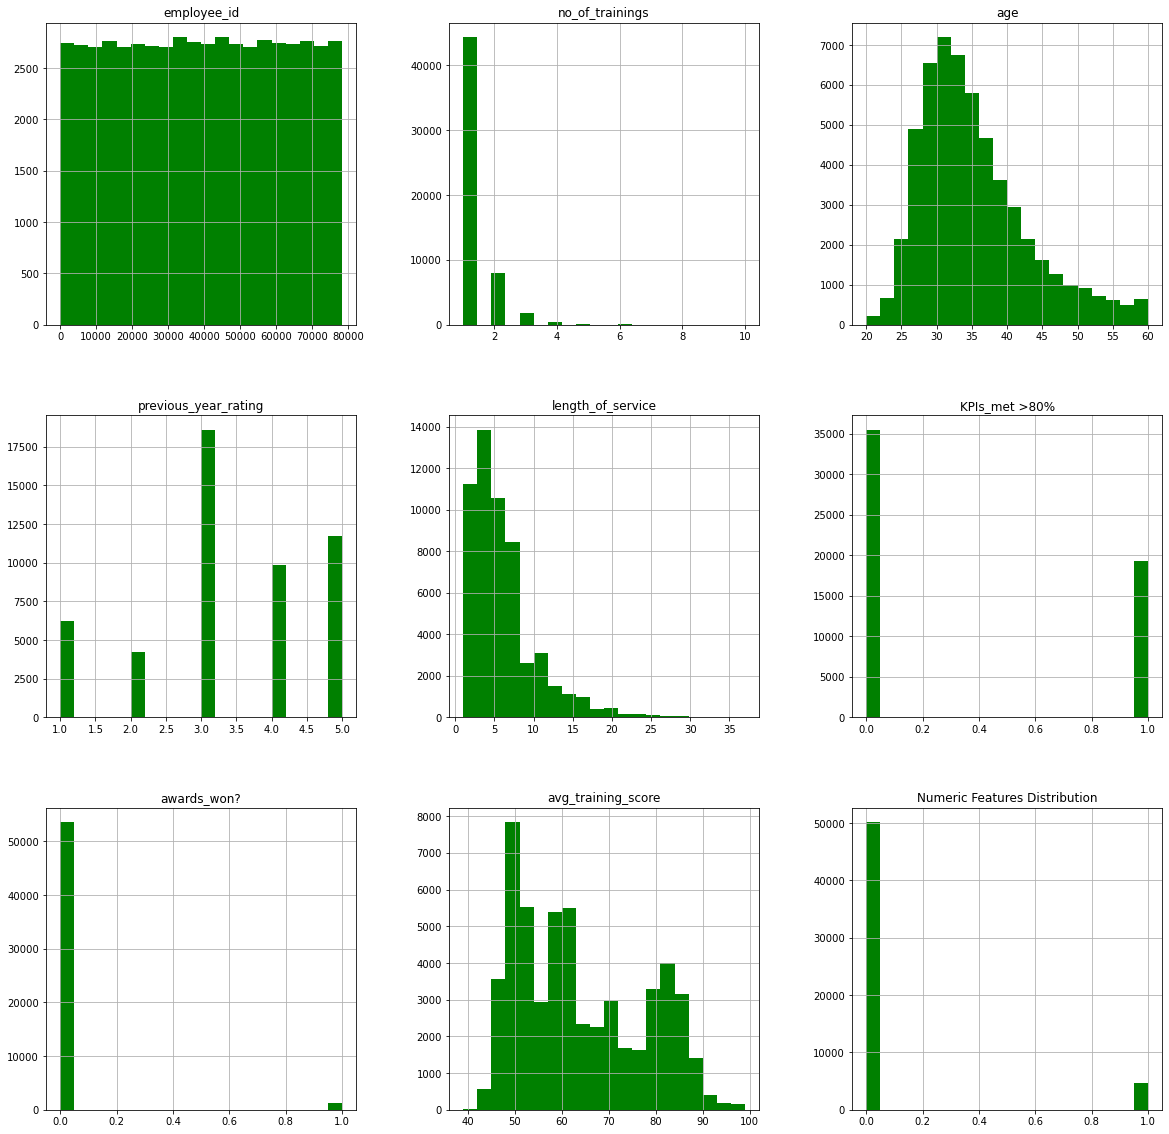

In [145]:
#Numeric features distrubution
train.hist(figsize=(20,20),bins = 20, color="green")
plt.title("Numeric Features Distribution")
plt.show()

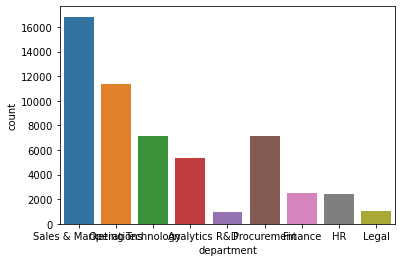

In [146]:
#department distribution
sns.countplot(data= train, x = "department")
plt.show()

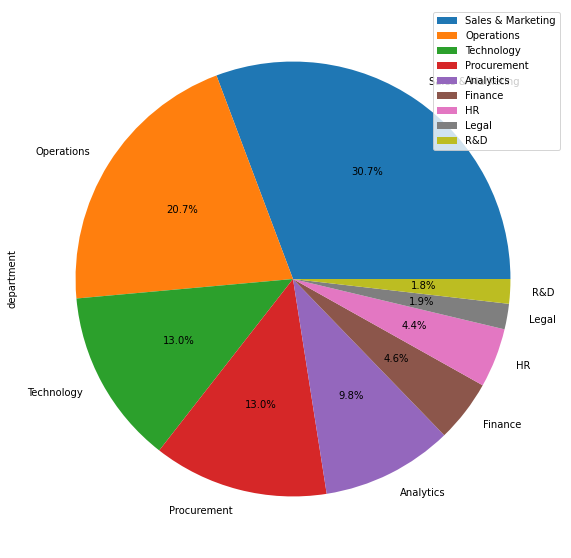

In [147]:
train["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

# Data Wrangling:

In [148]:
train.isnull()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [149]:
test.isnull()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,False,False,False,False,False,False,False,False,False,False,False,False,False
23486,False,False,False,False,False,False,False,False,False,False,False,False,False
23487,False,False,False,False,False,False,False,False,False,False,False,False,False
23488,False,False,False,False,False,False,False,False,True,False,False,False,False


<AxesSubplot:>

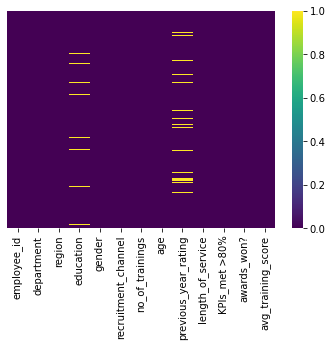

In [150]:
sns.heatmap(test.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

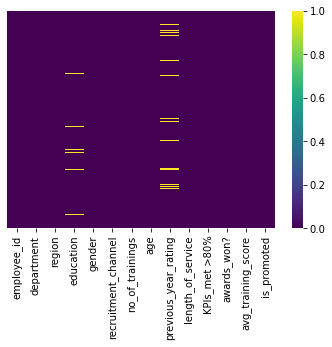

In [151]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

In [152]:
test.drop(['employee_id','region','recruitment_channel'],axis=1,inplace=True)

In [153]:
train.drop(['employee_id','region','recruitment_channel'],axis=1,inplace=True)

In [154]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0


In [155]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,NaN,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61


In [156]:
train.isnull().sum()

department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [157]:
test.isnull().sum()

department                 0
education               1034
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [158]:
#Working on previous_year_rating 
#train['previous_year_rating'].fillna(value=0,inplace=True)
#test['previous_year_rating'].fillna(value=0,inplace=True)

In [159]:

train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [160]:
#Working on education
train['education'] = train['education'].fillna(train['education'].mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [161]:
train.isnull().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [162]:
test.isnull().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [163]:
#remove Outlier:-
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [164]:
min_thresold,max_thresold=train.is_promoted.quantile([0.001,0.999])
min_thresold,max_thresold

(0.0, 1.0)

In [165]:
train[train.is_promoted<min_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [166]:
train[train.is_promoted>max_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [167]:
min_thresold,max_thresold=train.length_of_service.quantile([0.001,0.999])
min_thresold,max_thresold

(1.0, 30.0)

In [168]:
train[train.length_of_service<min_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [169]:
train[train.length_of_service>max_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1091,Procurement,Master's & above,m,1,58,3.0,31,0,0,72,0
1204,Technology,Bachelor's,f,1,60,3.0,31,0,0,82,0
1962,Operations,Master's & above,m,1,58,4.0,31,0,0,62,0
2004,Technology,Master's & above,f,1,60,3.0,34,0,0,84,0
6194,Sales & Marketing,Bachelor's,m,1,56,1.0,31,0,0,49,0
7929,Operations,Master's & above,f,1,60,5.0,33,1,0,65,0
8563,Procurement,Master's & above,m,2,60,5.0,32,1,0,69,1
9808,Technology,Bachelor's,m,1,57,3.0,31,0,0,82,0
10739,Procurement,Bachelor's,f,2,59,4.0,31,0,0,70,0
11227,Analytics,Bachelor's,m,2,60,5.0,34,1,0,87,1


In [170]:
train=train[train.length_of_service<max_thresold]
train.shape

(54752, 11)

In [171]:
#Previous_year_raring Outliers:
min_thresold,max_thresold=train.previous_year_rating.quantile([0.001,0.999])
min_thresold,max_thresold

(1.0, 5.0)

In [172]:
train[train.previous_year_rating<min_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [173]:
train[train.previous_year_rating>max_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [174]:
min_thresold,max_thresold=train.age.quantile([0.001,0.999])
min_thresold,max_thresold

(20.0, 60.0)

In [175]:
train[train.age>max_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [176]:
train[train.age<min_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [177]:
min_thresold,max_thresold=train.avg_training_score.quantile([0.001,0.999])
min_thresold,max_thresold

(42.0, 98.0)

In [178]:
train[train.avg_training_score<min_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
198,Sales & Marketing,Bachelor's,m,2,35,1.0,8,0,0,39,0
260,Sales & Marketing,Bachelor's,m,1,34,1.0,8,0,0,39,0
413,Sales & Marketing,Bachelor's,m,1,51,5.0,19,0,0,40,0
968,Sales & Marketing,Master's & above,m,3,44,1.0,7,0,0,40,0
2419,Sales & Marketing,Bachelor's,m,2,35,3.0,3,0,0,41,0
5538,Sales & Marketing,Bachelor's,m,1,36,5.0,2,1,0,41,0
10287,Sales & Marketing,Bachelor's,m,2,24,3.0,1,1,0,40,0
10559,Sales & Marketing,Bachelor's,f,2,32,1.0,5,0,0,41,0
11648,Sales & Marketing,Bachelor's,m,2,30,2.0,4,0,0,41,0
16515,Sales & Marketing,Bachelor's,m,1,32,5.0,6,1,0,41,0


In [179]:
train[train.avg_training_score>max_thresold]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
725,Operations,Master's & above,f,1,37,5.0,8,1,1,99,1
1503,Operations,Bachelor's,f,1,32,4.0,5,1,0,99,1
2071,Procurement,Bachelor's,m,1,32,5.0,4,0,1,99,1
3261,Procurement,Bachelor's,f,1,60,3.0,21,1,0,99,1
3394,Sales & Marketing,Master's & above,f,1,34,5.0,6,1,1,99,1
3582,Technology,Bachelor's,m,4,26,4.0,3,1,0,99,1
3788,Operations,Bachelor's,m,2,35,3.0,10,1,0,99,1
6502,Technology,Master's & above,m,1,36,3.0,9,0,1,99,1
6773,Technology,Bachelor's,f,1,28,5.0,2,1,0,99,1
11340,Operations,Bachelor's,m,1,31,5.0,7,1,1,99,1


In [180]:
train=train[(train.avg_training_score>min_thresold)&(train.avg_training_score<max_thresold)]
train.shape

(54585, 11)

In [181]:
min_thresold,max_thresold=train.no_of_trainings.quantile([0.001,0.999])
min_thresold,max_thresold

(1.0, 6.0)

In [182]:
train=train[(train.no_of_trainings>min_thresold)&(train.no_of_trainings<max_thresold)]
train.shape

(10305, 11)

In [183]:
test

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...
23485,Legal,Below Secondary,m,1,24,3.0,1,0,0,61
23486,Technology,Bachelor's,m,1,31,3.0,7,0,0,74
23487,HR,Bachelor's,f,1,26,4.0,4,0,0,50
23488,Procurement,Bachelor's,m,3,27,3.0,1,0,0,70


In [184]:
#Now we have to work on categorical data
train.select_dtypes(include='object')

,department,education,gender
3,Sales & Marketing,Bachelor's,m
5,Analytics,Bachelor's,m
13,Technology,Master's & above,m
24,Finance,Master's & above,m
31,Finance,Bachelor's,m
...,...,...,...
54788,Sales & Marketing,Bachelor's,f
54789,Sales & Marketing,Master's & above,m
54798,Sales & Marketing,Master's & above,f
54800,HR,Bachelor's,m


In [185]:
test.select_dtypes(include='object')

,department,education,gender
0,Technology,Bachelor's,m
1,HR,Bachelor's,f
2,Sales & Marketing,Bachelor's,m
3,Procurement,Bachelor's,f
4,Finance,Bachelor's,m
...,...,...,...
23485,Legal,Below Secondary,m
23486,Technology,Bachelor's,m
23487,HR,Bachelor's,f
23488,Procurement,Bachelor's,m


In [186]:
department=pd.get_dummies(train["department"])
department.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
3,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1
24,0,1,0,0,0,0,0,0,0
31,0,1,0,0,0,0,0,0,0


In [187]:
department=pd.get_dummies(train["department"],drop_first=True)
department.head()

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
3,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1
24,1,0,0,0,0,0,0,0
31,1,0,0,0,0,0,0,0


In [188]:
#Test department
department_test=pd.get_dummies(test["department"],drop_first=True)
department_test.head()

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0


In [189]:
#Remove dimmies data in education
education=pd.get_dummies(train["education"])
education.head()

,Bachelor's,Below Secondary,Master's & above
3,1,0,0
5,1,0,0
13,0,0,1
24,0,0,1
31,1,0,0


In [190]:
education=pd.get_dummies(train["education"],drop_first=True)
education.head()

,Below Secondary,Master's & above
3,0,0
5,0,0
13,0,1
24,0,1
31,0,0


In [191]:
#Test Education
education_test=pd.get_dummies(test["education"],drop_first=True)
education_test.head()

,Below Secondary,Master's & above
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [192]:
gender=pd.get_dummies(train["gender"])
gender.head()

,f,m
3,0,1
5,0,1
13,0,1
24,0,1
31,0,1


In [193]:
gender=pd.get_dummies(train["gender"],drop_first=True)
gender.head()

,m
3,1
5,1
13,1
24,1
31,1


In [194]:
gender_test=pd.get_dummies(test["gender"],drop_first=True)
gender_test

,m
0,1
1,0
2,1
3,0
4,1
...,...
23485,1
23486,1
23487,0
23488,1


In [195]:
train_data=pd.concat([department,education,gender],axis=1)

In [196]:
test_data=pd.concat([department_test,education_test,gender_test],axis=1)

In [197]:
train.drop(['department','education','gender'],axis=1,inplace=True)

In [198]:
train

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
3,2,39,1.0,10,0,0,50,0
5,2,31,3.0,7,0,0,85,0
13,2,39,3.0,16,0,0,80,0
24,2,39,5.0,7,0,0,59,0
31,2,26,1.0,2,0,0,61,0
...,...,...,...,...,...,...,...,...
54788,2,28,3.0,3,0,0,48,0
54789,3,31,3.0,9,0,0,50,0
54798,2,40,5.0,4,1,0,51,0
54800,2,34,5.0,3,0,0,52,0


In [199]:
test.drop(['department','education','gender'],axis=1,inplace=True)
test

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,24,3.0,1,1,0,77
1,1,31,3.0,5,0,0,51
2,1,31,1.0,4,0,0,47
3,3,31,2.0,9,0,0,65
4,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61
23486,1,31,3.0,7,0,0,74
23487,1,26,4.0,4,0,0,50
23488,3,27,3.0,1,0,0,70


In [200]:
pd.concat([train,train_data],axis=1)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,1
5,2,31,3.0,7,0,0,85,0,0,0,0,0,0,0,0,0,0,0,1
13,2,39,3.0,16,0,0,80,0,0,0,0,0,0,0,0,1,0,1,1
24,2,39,5.0,7,0,0,59,0,1,0,0,0,0,0,0,0,0,1,1
31,2,26,1.0,2,0,0,61,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54788,2,28,3.0,3,0,0,48,0,0,0,0,0,0,0,1,0,0,0,0
54789,3,31,3.0,9,0,0,50,0,0,0,0,0,0,0,1,0,0,1,1
54798,2,40,5.0,4,1,0,51,0,0,0,0,0,0,0,1,0,0,1,0
54800,2,34,5.0,3,0,0,52,0,0,1,0,0,0,0,0,0,0,0,1


In [201]:
pd.concat([test,test_data],axis=1)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m
0,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0,1
3,3,31,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,0,0,1,0,0,0,0,0,1,0,1
23486,1,31,3.0,7,0,0,74,0,0,0,0,0,0,0,1,0,0,1
23487,1,26,4.0,4,0,0,50,0,1,0,0,0,0,0,0,0,0,0
23488,3,27,3.0,1,0,0,70,0,0,0,0,1,0,0,0,0,0,1


# Spiliting the data

In [244]:
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)


Shape of the x : (10305, 7)
Shape of the y : (10305,)
Shape of the x Test : (23490, 7)


In [234]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)


(19138, 7)
(19138,)


In [235]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    9569
1     736
Name: is_promoted, dtype: int64
After Resampling :
0    9569
1    9569
Name: 0, dtype: int64


In [245]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (13396, 7)
Shape of the y Train : (13396, 1)
Shape of the x Valid : (5742, 7)
Shape of the y Valid : (5742, 1)
Shape of the x Test : (23490, 7)


In [237]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [238]:
# Lets use Decision Trees to classify the data
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)


Training Accuracy : 0.9851448193490594
Testing Accuracy : 0.9099616858237548


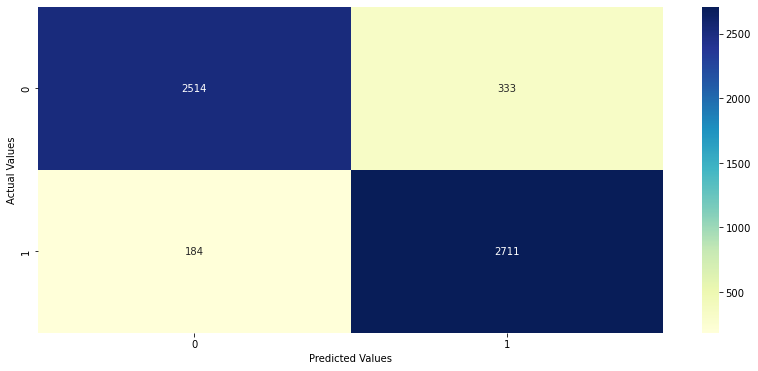

In [239]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [240]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2847
           1       0.89      0.94      0.91      2895

    accuracy                           0.91      5742
   macro avg       0.91      0.91      0.91      5742
weighted avg       0.91      0.91      0.91      5742



In [241]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y1_pred = model.predict(x_test)
print(y1_pred)


[0 0 0 ... 0 0 0]


In [242]:
test_1 = pd.read_csv("test_data.csv")

In [243]:
submission = pd.DataFrame({'employee_id': test_1['employee_id'] , 'is_promoted': y1_pred})
submission.to_csv('submission.csv', index = False)